In [382]:
import spotipy
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy import stats
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.model_selection import train_test_split
import spotify
%load_ext autoreload
%autoreload 2

from config import (
    api_key_lastfm,
    client_secret_lastfm,
    client_id,
    client_secret,
    redirect_uri
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [408]:
playlist_drill = '1z1tOO60TXJaLEfXb5Z1pw'
playlist_house = '1vIMNWoiysQgw4q13PErN4'
playlist_rap_us = '4OZ02mQrmS1LU8bkG09vq7'
playlist_afrobeat = '25Y75ozl2aI0NylFToefO5'
playlist_annees_80 = '0slE73JFtRr3F2KnfoWlbO'

playlist_ids = [playlist_drill, playlist_house, playlist_rap_us, playlist_afrobeat, playlist_annees_80]

In [ ]:
test = spotify.get_playlist_tracks('25Y75ozl2aI0NylFToefO5')

In [465]:
test.to_dict(orient='records')[10]

{'album_id': '1qAq4CaRxrA3WCmLx6WA8N',
 'album_name': 'International Lovin',
 'release_date': Timestamp('2024-11-01 00:00:00'),
 'album_artists_id': '0IUp0l21VlpoOz8525KfAJ, 0JRJpwTcWPoct6QSTNSqap',
 'album_artists_name': 'Mack H.D, Princess Wonda',
 'duration': 156.343,
 'track_id': '2rZeQKQOddBIGCNdYxkxG3',
 'track_name': 'International Lovin',
 'popularity': 45,
 'track_artists_id': '0IUp0l21VlpoOz8525KfAJ, 0JRJpwTcWPoct6QSTNSqap',
 'track_artists_name': 'Mack H.D, Princess Wonda',
 'track_listeners': '1927',
 'track_playcount': '3506',
 'similar_artists': 'Kelvyn Boy, Mack H.D, PapaRaZzle, tmaro, Lil Qhuid, Eony, Agatchu, Jipo',
 'track_tags': 'afrobeats, haiti',
 'image_url': 'https://i.scdn.co/image/ab67616d00001e02edfa6effd9298f528997b9d3',
 'spotify_url': 'https://open.spotify.com/track/2rZeQKQOddBIGCNdYxkxG3'}

In [409]:
dataset_list = []
for playlist_id in playlist_ids:
    playlist = spotify.get_playlist_tracks(playlist_id)
    dataset_list.append(playlist)
dataset = pd.concat(dataset_list, axis=0, ignore_index=True)
dataset

,album_id,album_name,release_date,album_artists_id,album_artists_name,duration,track_id,track_name,popularity,track_artists_id,track_artists_name,track_listeners,track_playcount,similar_artists,track_tags
0,208okgvV6yEx0Aq9t8zT4p,Polémique,2021-05-15,7GWvguZN6WpXDVaMDjg97v,pauldscrga,176.427,5nLe4rNMf6B5v9sJ6gGCQO,Polémique,0,"7GWvguZN6WpXDVaMDjg97v, 5OVwoZ9WDfQiyUkblkOGLe","pauldscrga, Freeze Cee",1519,11302,"Mini RTTCLAN, Adekhey, Swey Zen, 667, XIII B",
1,1hRmY5K4OzG8Wdxmn6YNlg,"669, Pt. 2",2021-05-16,4FjcWWBsbgD3TAEf2jQuVv,667,478.693,55rPRY6upmsnuCdJTW7UQt,"669, Pt. 2",37,"4FjcWWBsbgD3TAEf2jQuVv, 43mlbNLGRuLXwqTE8G61JB","667, Lyonzon",7697,88450,"Afro S, Mini RTTCLAN, Sazamyzy, DOC OVG, EniMa","cover, metal, hip hop, punk, rock, french, rap..."
2,0FEXxdB1W49qvYwKL0wnJh,669,2018-09-20,43mlbNLGRuLXwqTE8G61JB,Lyonzon,305.600,3nSL8n2FdvP3nLycf3Ip93,669,25,43mlbNLGRuLXwqTE8G61JB,Lyonzon,3132,25184,,"hip hop, french, rap, trap, Hip-Hop"
3,34cYXBHmeJ49Tr4Y3plD9H,"Ashe Tape, Vol. 3",2021-04-09,3tTvSeZiFDP3CY5EdPGcR4,ASHE 22,227.040,02uSh14aUckmfTVj5MEhmg,Scellé Part. 3,0,"3tTvSeZiFDP3CY5EdPGcR4, 76Pl0epAMXVXJspaSuz8im","ASHE 22, Freeze corleone",6826,62079,"Kaaris, Kpri, Osirus Jack, Alpha Wann, Ziak, L...","lyonzon, french, rap, france, Hip-Hop, drill"
4,7zrUnXByeOKHbXY3fyn6vz,LMF,2020-09-11,76Pl0epAMXVXJspaSuz8im,Freeze corleone,170.106,5IkofYa6Ac1plKIf6nYkDE,Scellé part.2,45,"76Pl0epAMXVXJspaSuz8im, 3tTvSeZiFDP3CY5EdPGcR4","Freeze corleone, ASHE 22",21597,272944,"Kaaris, Kpri, Osirus Jack, Ziak, Alpha Wann, L...","lyonzon, french, rap, france, Hip-Hop, drill"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,6Us9T05UuNDMP2NtVrSVyG,15 Ans D'Amour,1988-01-01,4RN2vlFWepLa46qQIU2PHs,Jacques Brel,229.906,0Yqvv7EV2VYgC299tA5ZaV,La valse à mille temps,44,4RN2vlFWepLa46qQIU2PHs,Jacques Brel,67069,274483,"Barbara, Charles Aznavour, Georges Brassens, L...","belgian, chanson francaise, french, chanson, s..."
596,2HkPAUQZm9D1wkJQeh9ENz,Louise Attaque,1997-04-22,4CAsSAU842glNKJX71ndA9,Louise Attaque,159.866,1xsRqL4cvEaOQ5TbXpqaAV,Ton invitation,57,4CAsSAU842glNKJX71ndA9,Louise Attaque,71231,334873,"Tarmac, La Rue Kétanou, Gaëtan Roussel, Noir D...","alternative, rock, french, chanson francaise, ..."
597,3Joq6r4mDrlqtUgpkmVJCR,AMSTERDAM (Edition limitée maxi 45 t),2019-04-13,4RN2vlFWepLa46qQIU2PHs,Jacques Brel,171.445,6mkiy9QOpV28CQvW0BMXbD,Amsterdam,45,4RN2vlFWepLa46qQIU2PHs,Jacques Brel,94675,440487,"Barbara, Charles Aznavour, Georges Brassens, L...","belgian, chanson francaise, french, chanson, s..."
598,3e3Nfe6qFPnmfxUtkBfYrj,La Bohème (Remastered 2014),NaT,2hgP9Ap2tc10R5jrQaEpMT,Charles Aznavour,245.186,2o0hVSbnkdvDDKKVNaUxnB,La bohème,4,2hgP9Ap2tc10R5jrQaEpMT,Charles Aznavour,168330,923021,"Jacques Brel, Yves Montand, Joe Dassin, Johnny...","french, chanson francaise, jazz, chanson, fran..."


In [452]:
dataset_vect = spotify.vectorize_recent_tracks(dataset, n_components=150, played_date=False)
dataset_vect

,popularity,duration,track_listeners,track_playcount,release_date,album_id,track_id,similar_artists_1,similar_artists_2,similar_artists_3,...,album_artists_id_141,album_artists_id_142,album_artists_id_143,album_artists_id_144,album_artists_id_145,album_artists_id_146,album_artists_id_147,album_artists_id_148,album_artists_id_149,album_artists_id_150
0,0,176.427,1519,11302,7805.0,127,444,-0.181376,-0.058655,0.000609,...,-0.005250,-0.005749,0.002589,-0.000607,-0.003039,-0.002465,0.000543,0.001495,-0.015465,-0.008610
1,37,478.693,7697,88450,7806.0,95,396,-0.180479,-0.077271,-0.001546,...,-0.015270,-0.043621,-0.008966,0.018754,-0.002032,0.038988,-0.017273,0.028867,-0.031002,-0.009926
2,25,305.600,3132,25184,6837.0,9,294,-0.149785,-0.023950,0.002652,...,-0.000537,-0.000486,0.000415,-0.000937,-0.000145,-0.000256,-0.000072,0.000248,0.001549,0.000840
3,0,227.040,6826,62079,7769.0,192,2,-0.440156,-0.815865,-0.070337,...,0.000108,-0.000522,0.000553,-0.000827,-0.000163,0.000190,-0.000008,0.000431,0.001080,0.001002
4,45,170.106,21597,272944,7559.0,489,419,-0.440156,-0.815865,-0.070337,...,-0.002362,0.001072,-0.001693,0.000543,0.000303,-0.002144,-0.000271,-0.001276,-0.000159,-0.002395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,44,229.906,67069,274483,-4383.0,407,43,-0.178332,0.008033,0.002073,...,-0.175831,-0.172657,0.157244,-0.035906,-0.033563,-0.050493,0.023108,0.004841,-0.002218,0.023020
596,57,159.866,71231,334873,-984.0,146,152,-0.157774,-0.025856,0.002875,...,-0.008820,0.104692,0.034091,-0.011022,0.007023,-0.022541,-0.003062,-0.015274,0.024606,0.018668
597,45,171.445,94675,440487,7042.0,212,513,-0.178332,0.008033,0.002073,...,-0.175831,-0.172657,0.157244,-0.035906,-0.033563,-0.050493,0.023108,0.004841,-0.002218,0.023020
598,4,245.186,168330,923021,NaN,236,223,-0.263609,0.358559,-0.008943,...,-0.045290,0.246366,-0.093227,-0.040710,0.009704,0.051100,-0.029620,0.004701,0.088893,0.003035


In [455]:
dataset_scaled = spotify.scale_and_weight(dataset_vect, weighted_features=['track_listeners', 'tracks_playcount', 'popularity', 'duration', 'release_date', 'album_id', 'track_tags', 'similar_artists', 'track_artists_id', 'album_artists_id'], weights=[0, 0, 0.5, 0.2, 400, 1000, 10000, 1000, 1500, 1500], n_components=150)
dataset_scaled

,popularity,duration,track_listeners,track_playcount,release_date,album_id,track_id,similar_artists_1,similar_artists_2,similar_artists_3,...,album_artists_id_141,album_artists_id_142,album_artists_id_143,album_artists_id_144,album_artists_id_145,album_artists_id_146,album_artists_id_147,album_artists_id_148,album_artists_id_149,album_artists_id_150
0,0.000000,0.043280,0.0,0.000475,374.984115,259.713701,0.744966,164.860123,456.622811,582.465821,...,822.605333,904.462674,547.200998,571.181387,451.033066,727.951676,561.467279,541.197635,649.411893,675.236449
1,0.217647,0.200000,0.0,0.003719,375.002269,194.274029,0.664430,165.143506,451.539902,581.792176,...,806.069939,828.269569,525.538111,596.075257,452.308192,791.066341,539.017039,583.076399,625.569121,673.115086
2,0.147059,0.110254,0.0,0.001059,357.411273,18.404908,0.493289,174.833421,466.098645,583.104506,...,830.382435,915.050878,543.124024,570.757371,454.697544,731.315174,560.692372,539.291030,675.520011,690.459184
3,0.000000,0.069522,0.0,0.002610,374.330580,392.638037,0.003356,83.164061,249.877461,560.286127,...,831.448210,914.978279,543.382682,570.898088,454.675614,731.993174,560.772440,539.570404,674.800608,690.719660
4,0.264706,0.040003,0.0,0.011476,370.518290,1000.000000,0.703020,83.164061,249.877461,560.286127,...,827.371624,918.184941,539.172803,572.659752,455.265156,728.439280,560.440921,536.959508,672.899158,685.247490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.258824,0.071008,0.0,0.011541,153.726060,832.310838,0.072148,165.821383,474.830957,582.923412,...,541.109816,568.671258,837.143316,525.795977,412.370539,654.825150,589.900230,546.317932,669.739941,726.189633
596,0.335294,0.034694,0.0,0.014080,215.430698,298.568507,0.255034,172.311423,465.578189,583.174433,...,816.713915,1126.650671,606.260243,557.790140,463.777728,697.384199,556.924863,515.541881,710.902141,719.179256
597,0.264706,0.040697,0.0,0.018521,361.132795,433.537832,0.860738,165.821383,474.830957,582.923412,...,541.109816,568.671258,837.143316,525.795977,412.370539,654.825150,589.900230,546.317932,669.739941,726.189633
598,0.023529,0.078931,0.0,0.038810,NaN,482.617587,0.374161,138.899708,570.537199,579.479559,...,756.530700,1411.673831,367.566467,519.618357,467.172981,809.506863,523.459144,546.103056,809.555292,693.995949


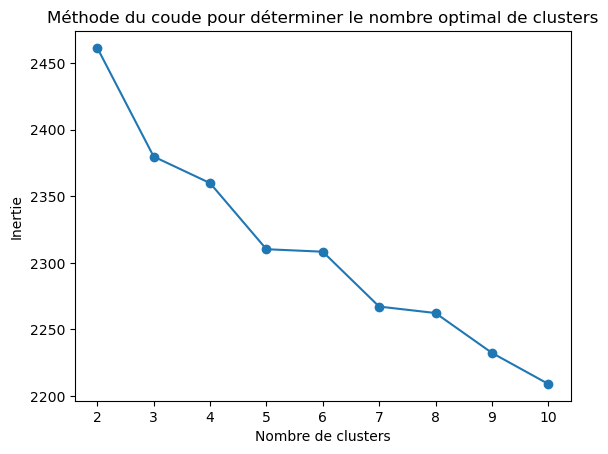

In [456]:
spotify.visualize_clustering(df=dataset_scaled, feature=dataset[['track_name']])

In [399]:
### Get a dataframe with last tracks
df = spotify.get_recent_tracks(10)

In [401]:
### Vectorize data from this dataframe
df_vect = spotify.vectorize_recent_tracks(df, n_components=3, played_date=False)

In [353]:
df_scaled = spotify.scale_and_weight(df_vect, weighted_features=['popularity', 'release_date', 'album_id', 'track_tags', 'track_artists_id'], weights=[2, 2, 3, 2, 3], n_components=3)

In [354]:
clusters = spotify.clustering(df_scaled)
df['cluster'] = clusters

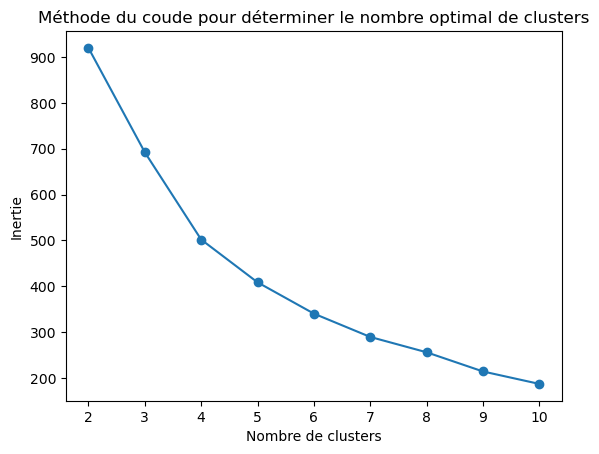

In [355]:
spotify.visualize_clustering(df=df_scaled, feature=df[['track_name']])

In [311]:
cluster_dfs = spotify.get_tracklist(df, limit=1)
cluster_vect_dfs = spotify.vectorize_tracklist(cluster_dfs, weighted_features=['popularity', 'release_date', 'album_id', 'track_tags', 'track_artists_id'], weights=[2, 2, 3, 2, 3], n_components=1)
cosine_matrices = spotify.compute_cosine_matrices(cluster_vect_dfs)

c:\Anaconda\lib\site-packages\sklearn\decomposition\_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [313]:
similar_tracks = spotify.search_similar_tracks_by_pos(df, cluster_dfs, cosine_matrices, track_pos=6)
similar_tracks

"Tracks similaires à 'Monaco' : Minimum ça, CIEL, Boucan (feat. Franglish), On y va, OHMA TOKITA"

In [467]:
similar_tracks = 'EUPHON, A$AP, HAINE&SEX, Acte de Burberry, GROKUWA'

In [468]:
similar_tracks[0]

'E'